# Import necessary libraries and packages

In [29]:
import pandas as pd
import numpy as np
import re
import string
import nltk
nltk.download('stopwords',quiet = 'True')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
!pip install -q textblob
from textblob import TextBlob,Word
import warnings
warnings.filterwarnings('ignore')

# Display first 5 rows

In [2]:
df = pd.read_csv("D:/datasets/Sentiment Analysis on Student Feedback..csv")
df.head()

,Timestamp,Course Code,Feedback,Sentiment,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department
0,2024/03/10 10:13:18 PM GMT+5:30,ECE 1003,Course is kk.but teaching is bad,Negative,No,Female,Regular,Moderate,2,5,Yes
1,2024/03/10 10:24:15 PM GMT+5:30,CSE 1005,teaching is good,Positive,No,Female,Regular,Easy,11,9,Yes
2,2024/03/10 10:44:52 PM GMT+5:30,CSE 1005,It's good,Positive,No,Female,Regular,Challenging,7,8,Yes
3,2024/03/11 1:29:44 PM GMT+5:30,CSE 1005,The lecturers are knowledgeable and library fa...,Positive,Yes,Female,Irregular,Moderate,15,8,Yes
4,2024/03/11 4:06:44 PM GMT+5:30,MAT 1002,Teaching is almost good .,Neutral,Yes,Female,Occasional,Moderate,6,8,No


# No of rows and columns of the dataset

In [3]:
df.shape

(83, 11)

# Basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Timestamp               83 non-null     object
 1   Course Code             83 non-null     object
 2   Feedback                83 non-null     object
 3   Sentiment               83 non-null     object
 4   Previous Experience     83 non-null     object
 5   Gender                  83 non-null     object
 6   Attendance              83 non-null     object
 7   Course Difficulty       83 non-null     object
 8   Study Hours (per week)  83 non-null     int64 
 9   Overall Satisfaction    83 non-null     int64 
 10  Department              83 non-null     object
dtypes: int64(2), object(9)
memory usage: 7.3+ KB


# Data Preprocessing

In [5]:
# Changing timestamp to date-time format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
# Extract date and time into separate columns
df['Date'] = df['Timestamp'].dt.date
df['Time'] = df['Timestamp'].dt.time
# Drop the timestamp column
new_df = df.drop(['Timestamp'],axis=1)

In [6]:
# first 5 rows after dropping timestamp column
new_df.head()

,Course Code,Feedback,Sentiment,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department,Date,Time
0,ECE 1003,Course is kk.but teaching is bad,Negative,No,Female,Regular,Moderate,2,5,Yes,2024-03-10,22:13:18
1,CSE 1005,teaching is good,Positive,No,Female,Regular,Easy,11,9,Yes,2024-03-10,22:24:15
2,CSE 1005,It's good,Positive,No,Female,Regular,Challenging,7,8,Yes,2024-03-10,22:44:52
3,CSE 1005,The lecturers are knowledgeable and library fa...,Positive,Yes,Female,Irregular,Moderate,15,8,Yes,2024-03-11,13:29:44
4,MAT 1002,Teaching is almost good .,Neutral,Yes,Female,Occasional,Moderate,6,8,No,2024-03-11,16:06:44


In [7]:
# Initial Sentiment Count
df['Sentiment'].value_counts()

Positive    47
Neutral     26
Negative    10
Name: Sentiment, dtype: int64

In [8]:
# Checking for missing values
new_df.isnull().sum()

Course Code               0
Feedback                  0
Sentiment                 0
Previous Experience       0
Gender                    0
Attendance                0
Course Difficulty         0
Study Hours (per week)    0
Overall Satisfaction      0
Department                0
Date                      0
Time                      0
dtype: int64

In [9]:
# Preprocessing the data further
def handle_contractions(text):
    # handling contractions   
    contractions = {
        "n't": " not",
        "'s": " is",
        "'re": " are",
        "'ve": " have",
        "'d": " would",
        "'ll": " will",
        "'m": " am",
        "nw": "now"
    }
    words = text.split()
    for i in range(len(words)):
        if words[i] in contractions:
            words[i] = contractions[words[i]]
    return ' '.join(words)


def preprocess_text(text):
    
    # converting to lowercase for consistency in analysis
    text = text.lower()
    
    # removing nos or digits
    text = re.sub(r'\b[0-9]+\b\s*', '', text)

    # removing punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Correcting spellings (if any) using TextBlob
    blob = TextBlob(text)
    corr_text = blob.correct()
    new_text = str(corr_text)
    
    # Applying tokenization
    tokens = word_tokenize(new_text)

    # Stopwords removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]

    # Convert to lowercase
    tokens = [token.lower() for token in tokens]

    # Handle contractions
    new_text = handle_contractions(' '.join(tokens))

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in word_tokenize(new_text)]

    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Apply preprocessing to the 'Feedback' column
new_df['Processed_Feedback'] = new_df['Feedback'].apply(preprocess_text)

In [10]:
# Display the feedback column after preprocessing
new_df['Processed_Feedback']

0                                   course teaching bad
1                                         teaching good
2                                                  good
3           lecture knowledgeable library facility good
4                                  teaching almost good
                            ...                        
78       workload manageable assignment felt repetition
79    group project provided valuable opportunity co...
80    course could benefit update resource recent in...
81    instructor feedback assignment constructive he...
82    course fantastic lecturer averaged teaching mo...
Name: Processed_Feedback, Length: 83, dtype: object

In [11]:
# subjectivity and polarity scores
def get_sentiment_scores(text):
    blob = TextBlob(text)
    return pd.Series([blob.sentiment.polarity, blob.sentiment.subjectivity])
sentiment_scores = new_df['Processed_Feedback'].apply(get_sentiment_scores)
new_df[['Sentiment_Score','Subjectivity_Score']] = sentiment_scores

new_df['Sentiment_label'] = new_df.apply(lambda row: 'Positive' if row['Sentiment_Score'] > 0 and
                                         row['Subjectivity_Score'] > 0.5 else 
                                        'Negative' if row['Sentiment_Score'] < 0 and 
                                         row['Subjectivity_Score'] > 0.5 else 'Neutral', axis=1)
new_df.drop('Sentiment',axis = 1,inplace = True)

In [12]:
# Since we got the polarity and subjectivity scores, we will drop the original feedback column
new_df.drop('Feedback',axis = 1,inplace = True)

In [13]:
# Shape of the current dataframe
new_df.shape

(83, 14)

In [14]:
# Display first 5 rows
new_df.head()

,Course Code,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department,Date,Time,Processed_Feedback,Sentiment_Score,Subjectivity_Score,Sentiment_label
0,ECE 1003,No,Female,Regular,Moderate,2,5,Yes,2024-03-10,22:13:18,course teaching bad,-0.7,0.666667,Negative
1,CSE 1005,No,Female,Regular,Easy,11,9,Yes,2024-03-10,22:24:15,teaching good,0.7,0.600000,Positive
2,CSE 1005,No,Female,Regular,Challenging,7,8,Yes,2024-03-10,22:44:52,good,0.7,0.600000,Positive
3,CSE 1005,Yes,Female,Irregular,Moderate,15,8,Yes,2024-03-11,13:29:44,lecture knowledgeable library facility good,0.7,0.600000,Positive
4,MAT 1002,Yes,Female,Occasional,Moderate,6,8,No,2024-03-11,16:06:44,teaching almost good,0.7,0.600000,Positive


In [15]:
# Sentiment count as predicted by TextBlob library
new_df['Sentiment_label'].value_counts()

Positive    50
Neutral     27
Negative     6
Name: Sentiment_label, dtype: int64

# Exploratory Data Analysis (EDA)

In [16]:
#analyzing values of overall satisfaction column and its count
print(f"value count:\n{new_df['Overall Satisfaction'].value_counts()}")

value count:
7     19
9     14
8     14
10     9
5      7
6      6
3      5
2      4
4      3
0      1
1      1
Name: Overall Satisfaction, dtype: int64


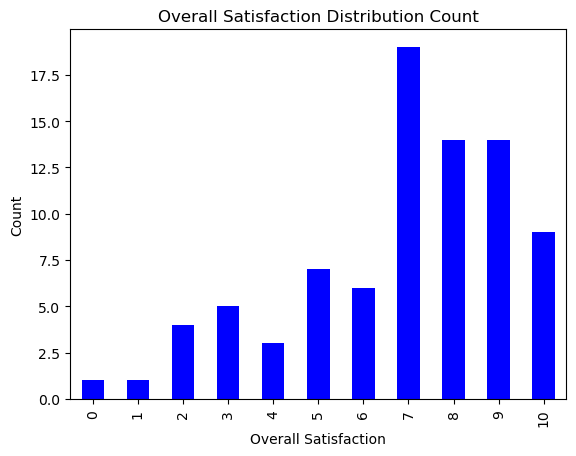

In [17]:
## BAR PLOT
import matplotlib.pyplot as plt

# bar plot for overall satisfaction
new_df['Overall Satisfaction'].value_counts().sort_index().plot.bar(color='blue')
plt.title('Overall Satisfaction Distribution Count')
plt.xlabel('Overall Satisfaction')
plt.ylabel('Count')
plt.show()

Percentage distribution:
 7     22.891566
9     16.867470
8     16.867470
10    10.843373
5      8.433735
6      7.228916
3      6.024096
2      4.819277
4      3.614458
0      1.204819
1      1.204819
Name: Overall Satisfaction, dtype: float64
feedback value count:
Positive    47
Neutral     26
Negative    10
Name: Sentiment, dtype: int64
study hours value count:
6     16
10     7
1      7
2      6
12     6
7      5
8      5
3      5
14     4
15     3
20     3
4      3
5      3
21     2
13     2
18     2
9      2
11     1
22     1
Name: Study Hours (per week), dtype: int64

Percentage distribution:
6     19.277108
10     8.433735
1      8.433735
2      7.228916
12     7.228916
7      6.024096
8      6.024096
3      6.024096
14     4.819277
15     3.614458
20     3.614458
4      3.614458
5      3.614458
21     2.409639
13     2.409639
18     2.409639
9      2.409639
11     1.204819
22     1.204819
Name: Study Hours (per week), dtype: float64


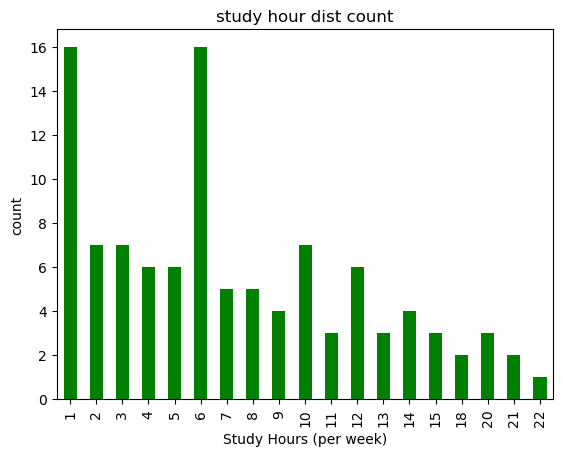

In [18]:
percentage_distribution = new_df['Overall Satisfaction'].value_counts(normalize=True) * 100
print("Percentage distribution:\n", percentage_distribution)

# distict values of "feedback" and its count
print(f"feedback value count:\n{df['Sentiment'].value_counts()}")

# analyzing study hours column
new_df['Study Hours (per week)'] = df['Study Hours (per week)']
print(f"study hours value count:\n{df['Study Hours (per week)'].value_counts()}")
print(f"\nPercentage distribution:\n{df['Study Hours (per week)'].value_counts(normalize=True) * 100}")

new_df['Study Hours (per week)'].value_counts().plot.bar(color='green')
new_df['Study Hours (per week)'].value_counts().sort_index().plot.bar(color='green')
plt.title('study hour dist count')
plt.xlabel('Study Hours (per week)')
plt.ylabel('count')
plt.show()


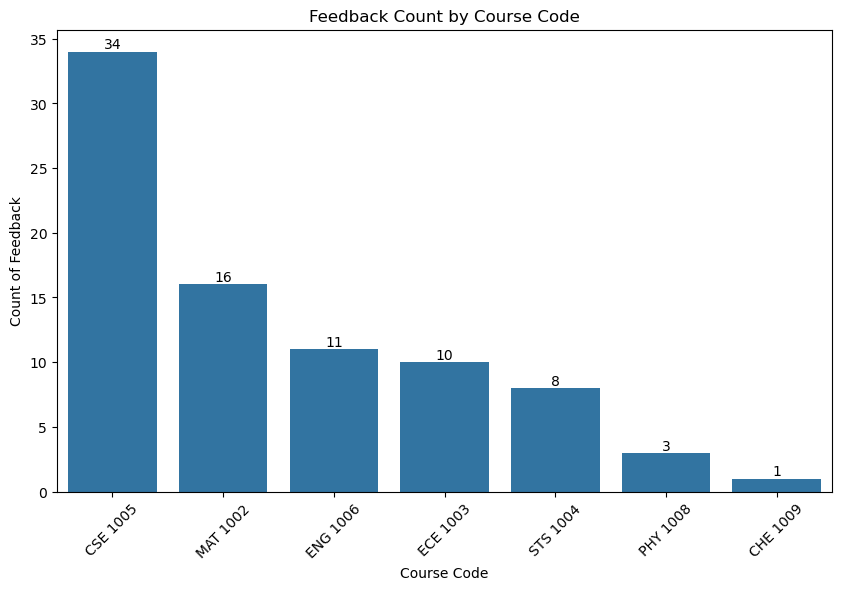

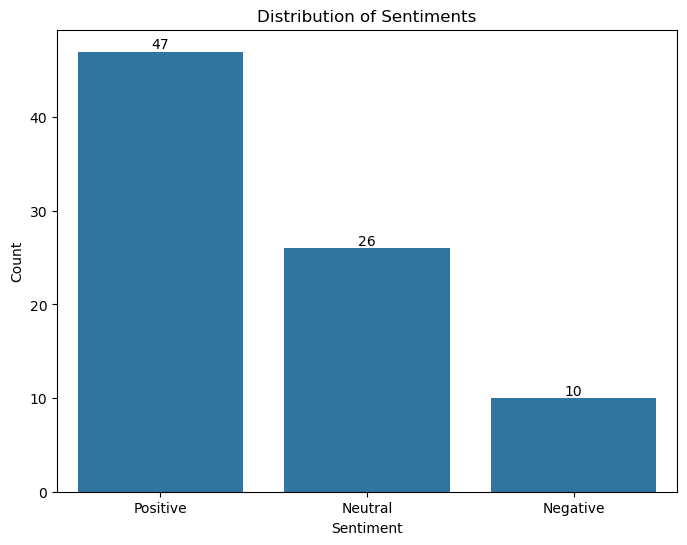

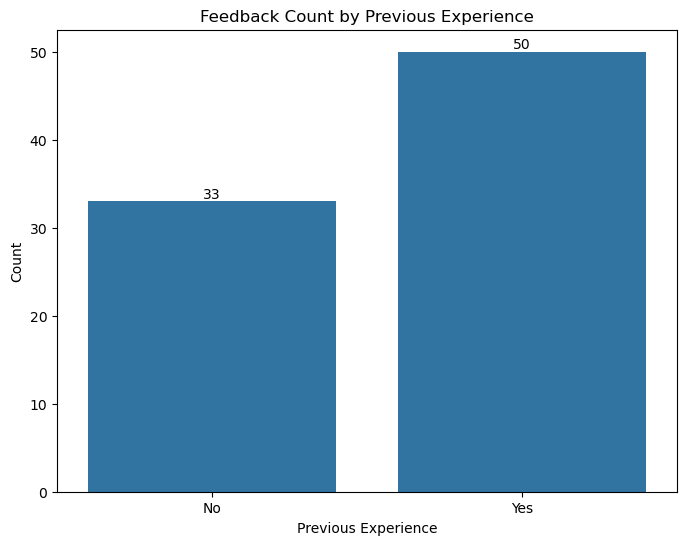

In [19]:
import seaborn as sns

# Bar plot for Course Code

plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
order = new_df['Course Code'].value_counts().index
ax = sns.countplot(data=df, x='Course Code', color=color, order=order)
plt.xlabel('Course Code')
plt.ylabel('Count of Feedback')
plt.title('Feedback Count by Course Code')
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()


# Bar plot for Sentiment
plt.figure(figsize=(8, 6))
color = sns.color_palette()[0]
order = df['Sentiment'].value_counts().index
ax = sns.countplot(data=df, x='Sentiment', color=color, order=order)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()


# Bar plot for Previous Experience
plt.figure(figsize=(8, 6))
color = sns.color_palette()[0]
ax = sns.countplot(data=df, x='Previous Experience', color=color)
plt.xlabel('Previous Experience')
plt.ylabel('Count')
plt.title('Feedback Count by Previous Experience')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()


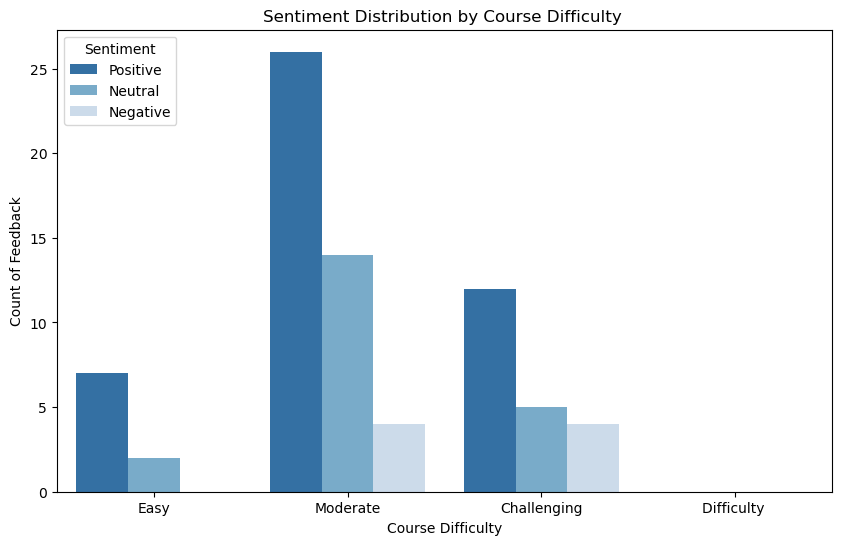

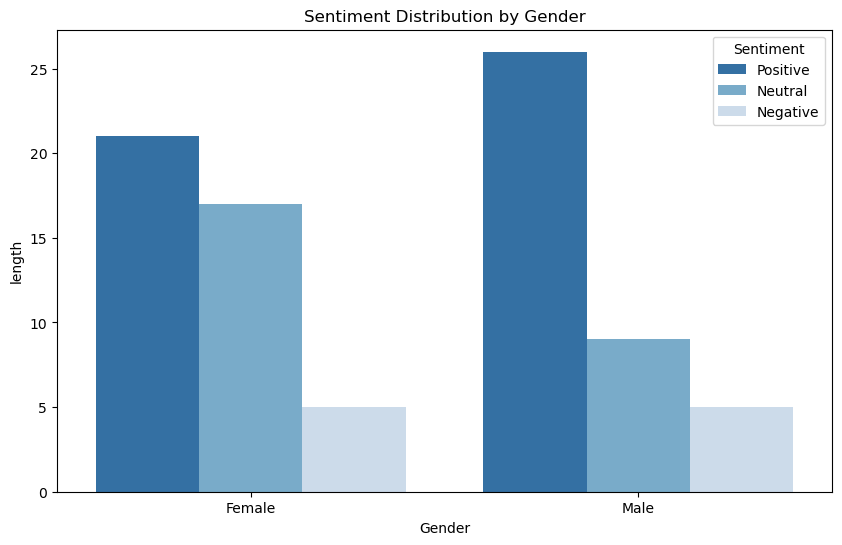

In [20]:
# # Multiple bar plot

plt.figure(figsize=(10, 6))
hue_order = ['Positive', 'Neutral', 'Negative']
order = ['Easy', 'Moderate', 'Challenging', 'Difficulty ']
sns.countplot(data=df, x='Course Difficulty ', hue='Sentiment', 
              palette='Blues_r', hue_order=hue_order, order=order)
plt.xlabel('Course Difficulty')
plt.ylabel('Count of Feedback')
plt.title('Sentiment Distribution by Course Difficulty ')
plt.show()

#Sentiment Distribution by Gender
plt.figure(figsize=(10, 6))
hue_order = ['Positive', 'Neutral', 'Negative']
sns.countplot(data=df, x='Gender', hue='Sentiment', hue_order=hue_order, palette='Blues_r')
plt.xlabel('Gender')
plt.ylabel('length')
plt.title('Sentiment Distribution by Gender')
plt.show()


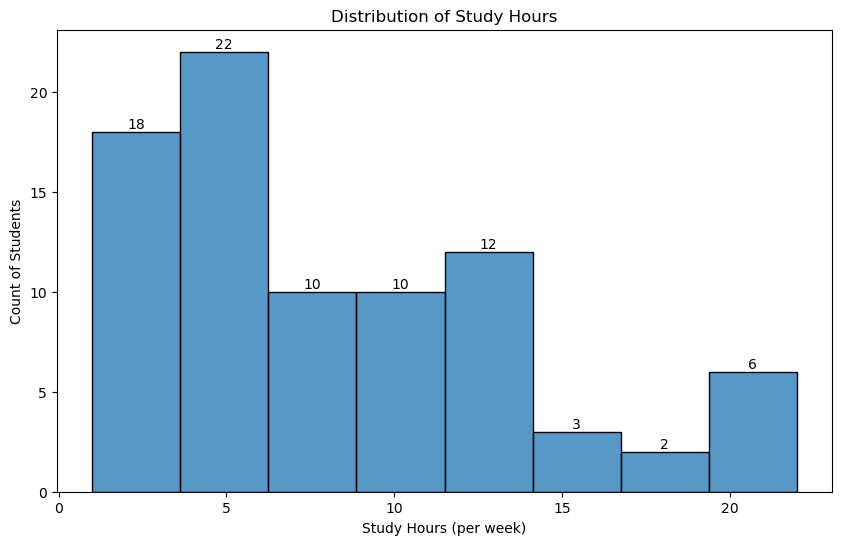

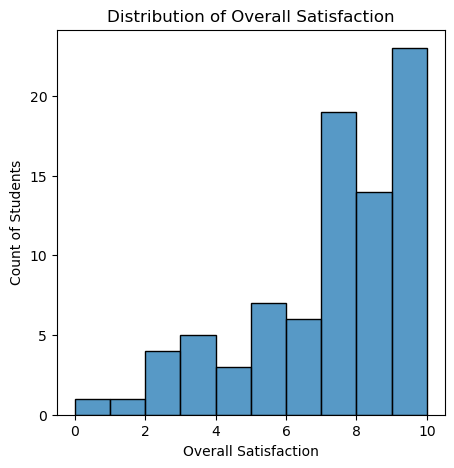

In [21]:
# # Histogram

# Histogram for Study Hours (per week)
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
ax = sns.histplot(data=df, x='Study Hours (per week)', bins=8, color=color)
plt.xlabel('Study Hours (per week)')
plt.ylabel('Count of Students')
plt.title('Distribution of Study Hours')
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge')
plt.show()

# Histogram for Overall Satisfaction
plt.figure(figsize=(5, 5))
sns.histplot(data=df, x='Overall Satisfaction', bins=10)
plt.xlabel('Overall Satisfaction')
plt.ylabel('Count of Students')
plt.title('Distribution of Overall Satisfaction')
plt.show()


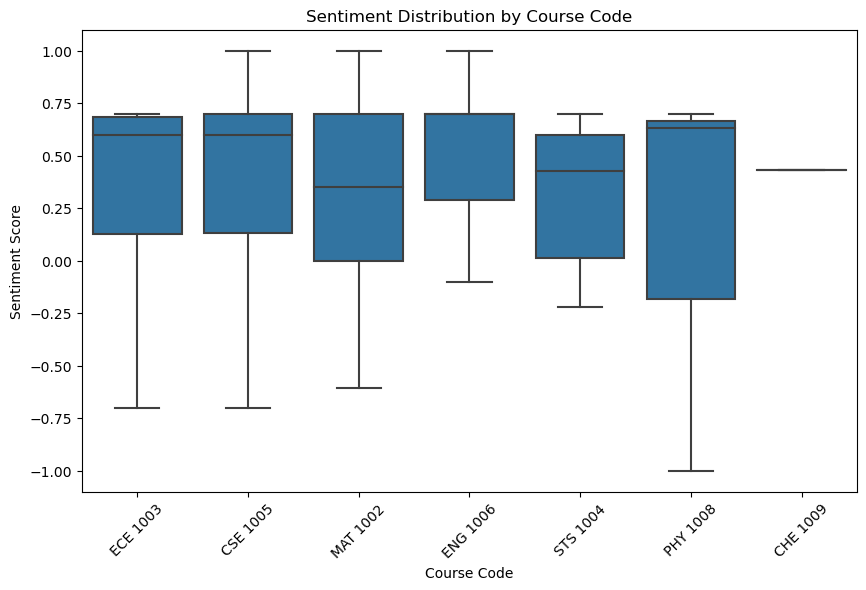

In [22]:
# # Box Plot

# Sentiment Box Plots
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
sns.boxplot(data=new_df, x='Course Code', y='Sentiment_Score', color=color)
plt.xlabel('Course Code')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Distribution by Course Code')
plt.xticks(rotation=45)
plt.show()


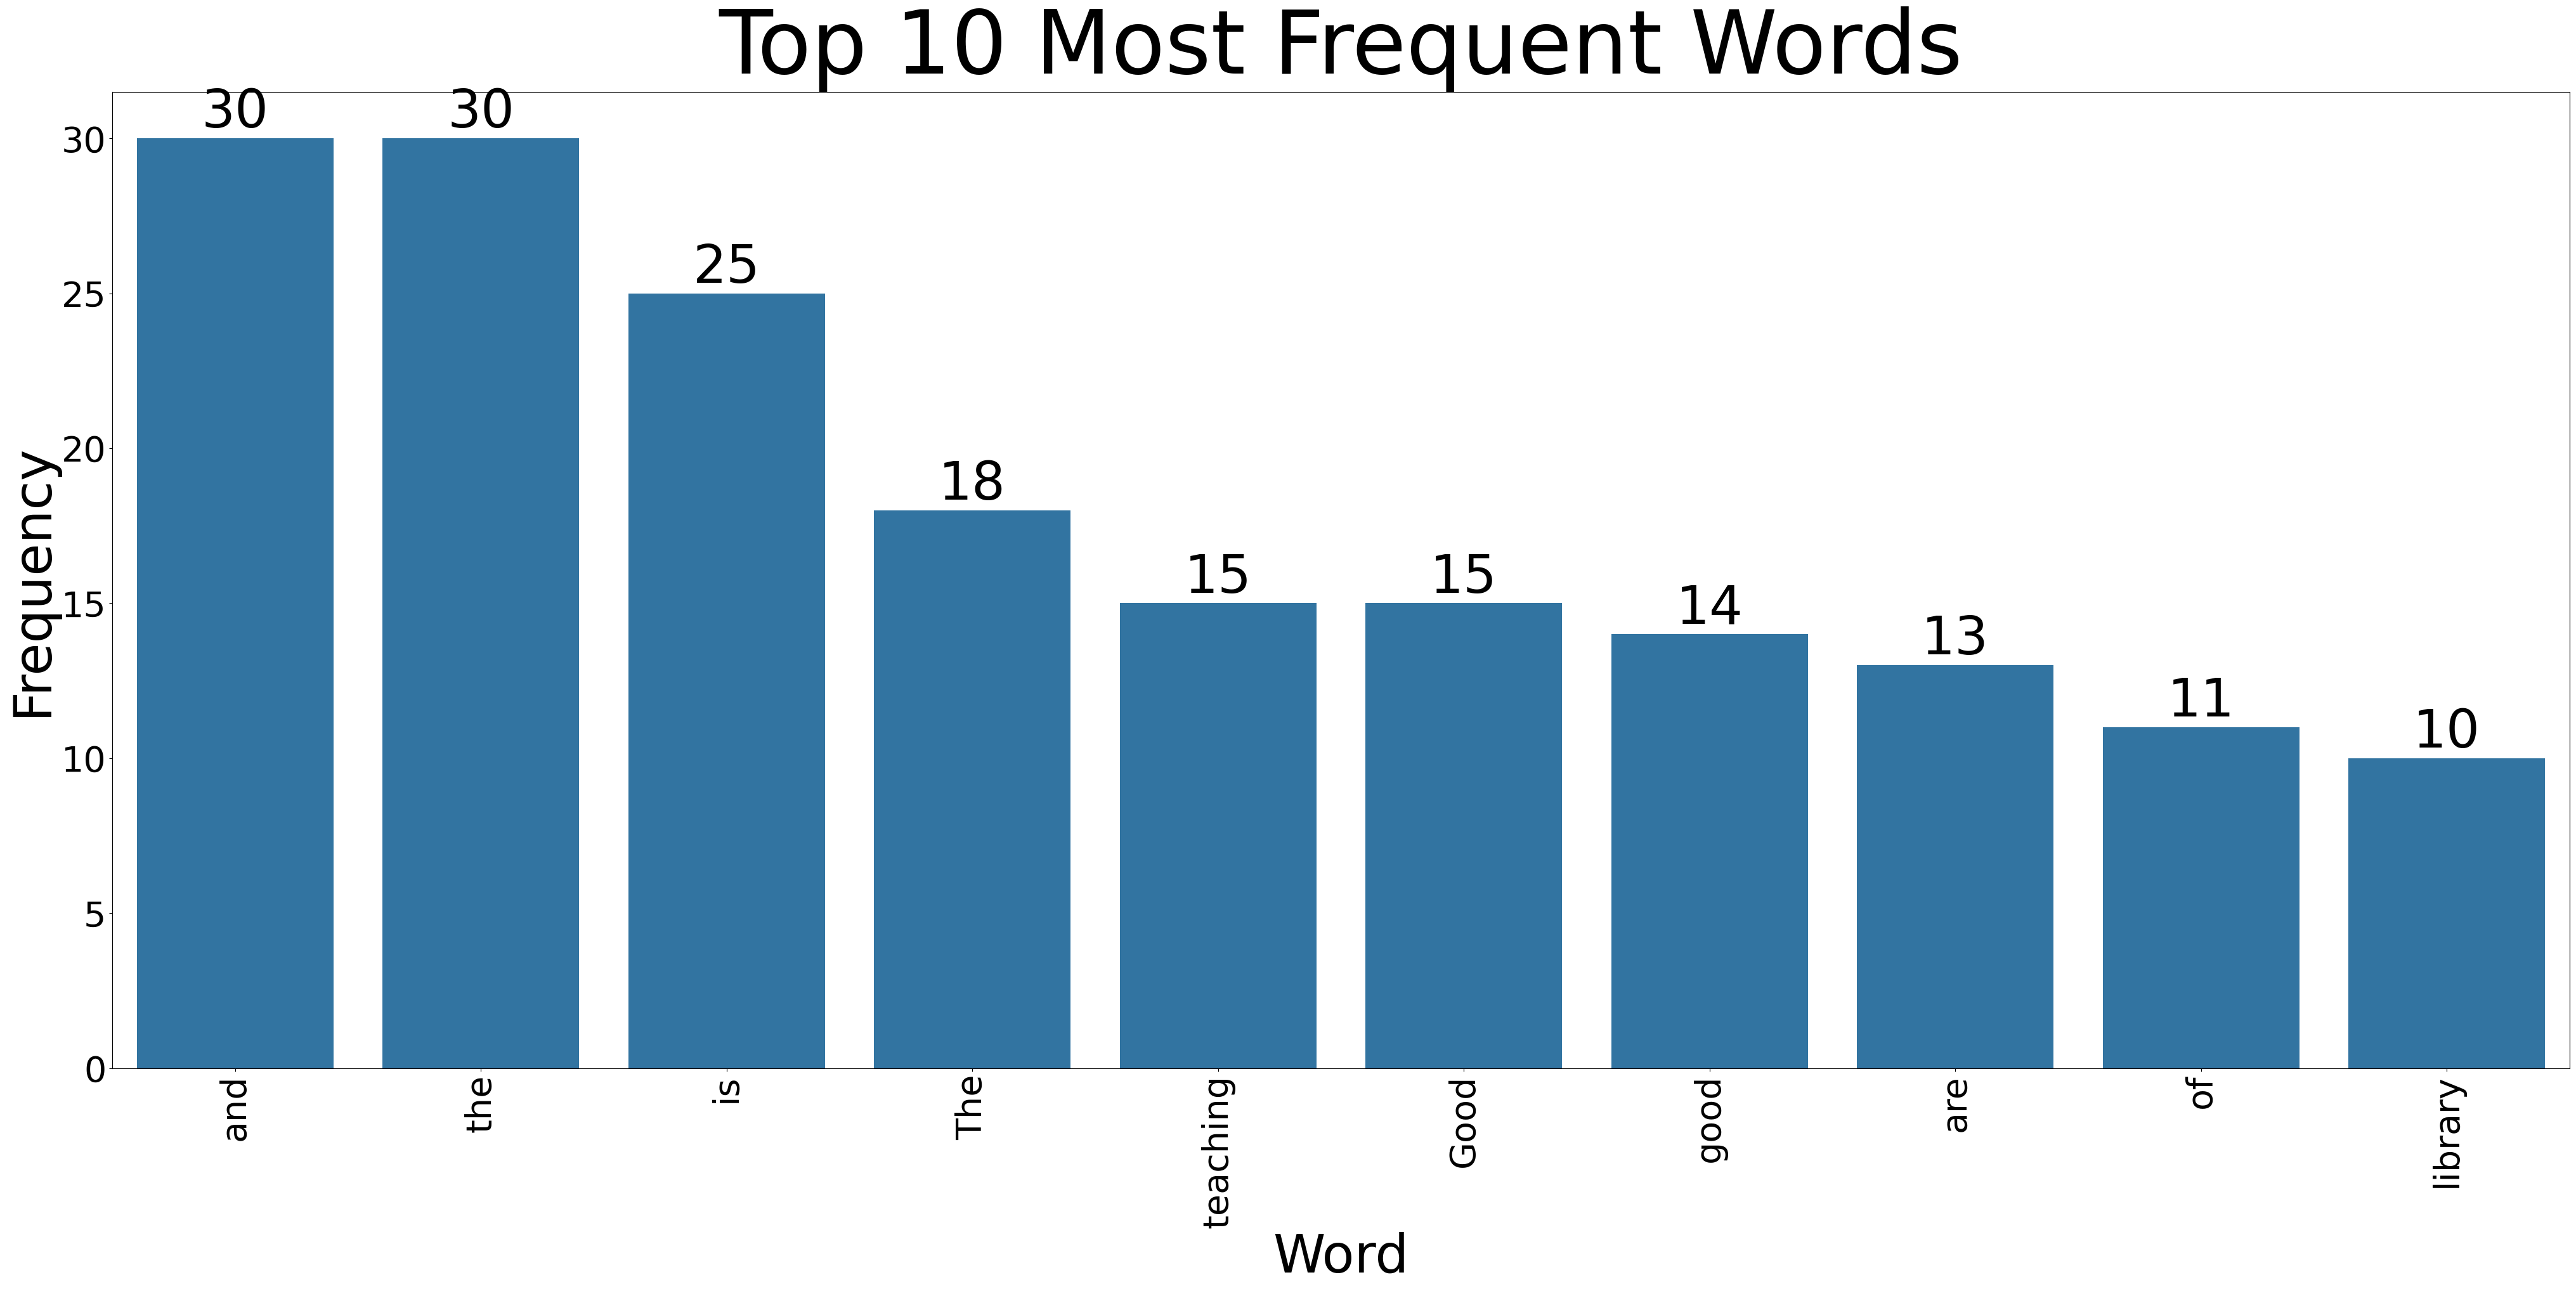

In [23]:
# # Word Frequency Analysis

from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

word_frequency = Counter(" ".join(df['Feedback']).split()).most_common(10)
plt.figure(figsize=(50, 20))
color = sns.color_palette()[0]
ax = sns.barplot(x=[word[0] for word in word_frequency], y=[word[1] for word in word_frequency], color=color)
ax.bar_label(ax.containers[0], fmt='%.0f', label_type='edge', fontsize=60)
plt.xlabel('Word', fontsize=60)
plt.ylabel('Frequency', fontsize=60)
plt.title('Top 10 Most Frequent Words', fontsize=100)
plt.xticks(rotation=90, fontsize=40)  # rotate x-axis labels by 90 degrees and set font size to 40
plt.yticks(fontsize=40)  # set font size of y-axis labels to 40
plt.show()


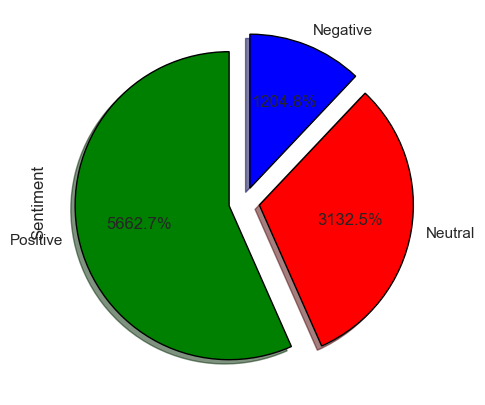

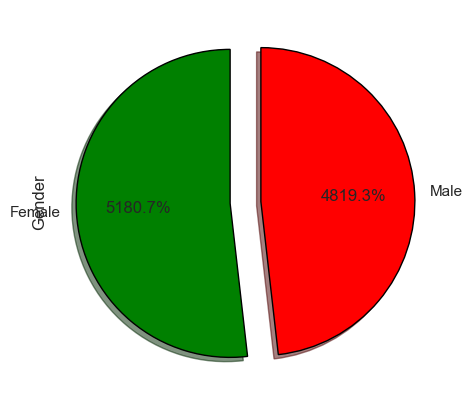

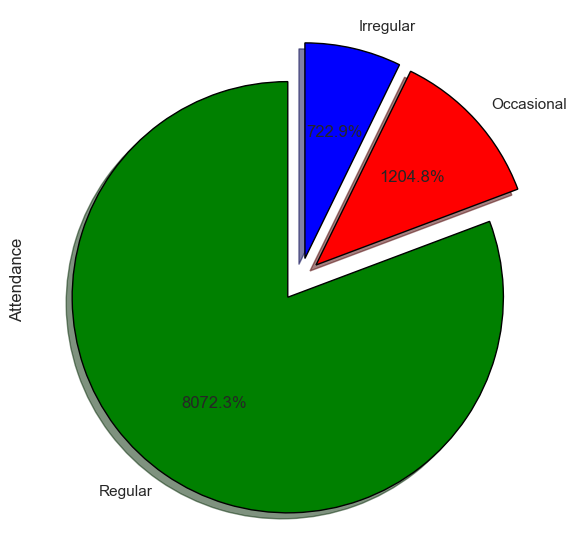

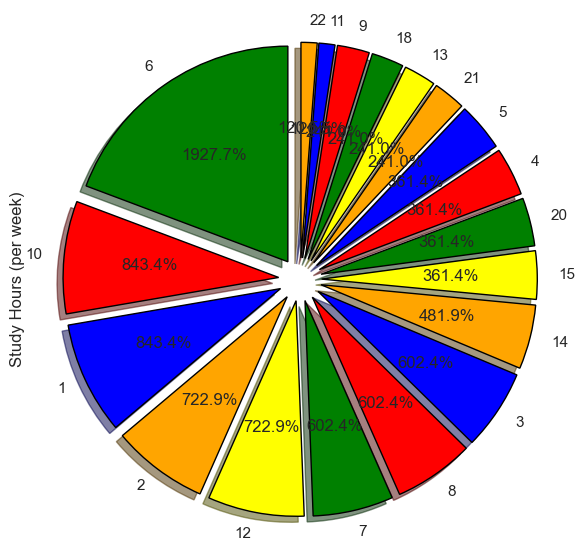

In [32]:
# # Pie Chart

#Sentiment
fig = plt.figure(figsize=(5,5))
colors = ('green','red','blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":"black"}
tags = df['Sentiment'].value_counts(normalize=True)
explode = [0.1]*len(tags)
tags.plot(kind='pie', autopct=lambda p : '{:.1f}%'.format(p*100), shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

plt.show()

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

#GENDER
fig = plt.figure(figsize=(5,5))
colors = ('green','red','blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":"black"}
tags = df['Gender'].value_counts(normalize=True)
explode = [0.1]*len(tags)
tags.plot(kind='pie', autopct=lambda p : '{:.1f}%'.format(p*100), shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

plt.show()

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

#Attendance
fig = plt.figure(figsize=(7,7))
colors = ('green','red','blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":"black"}
tags = df['Attendance'].value_counts(normalize=True)
explode = [0.1]*len(tags)
tags.plot(kind='pie', autopct=lambda p : '{:.1f}%'.format(p*100), shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

plt.show()

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")

#Study Hours
fig = plt.figure(figsize=(7,7))
colors = ('green','red','blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":"black"}
tags = df['Study Hours (per week)'].value_counts(normalize=True)
explode = [0.1]*len(tags)
tags.plot(kind='pie', autopct=lambda p : '{:.1f}%'.format(p*100), shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode)

plt.show()

from io import BytesIO
graph = BytesIO()
fig.savefig(graph, format="png")


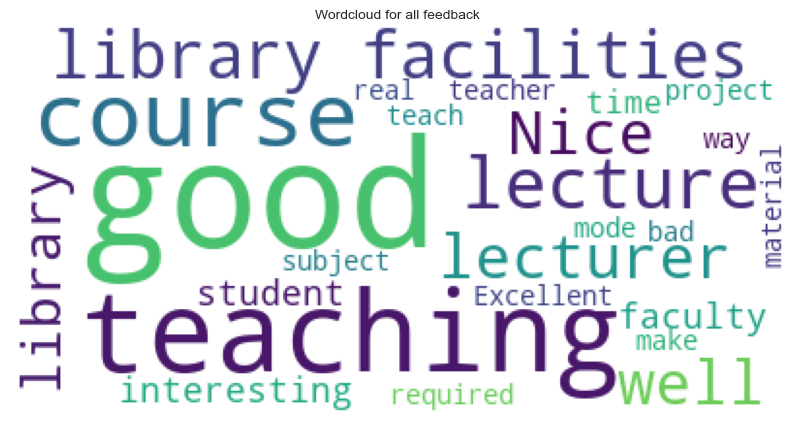

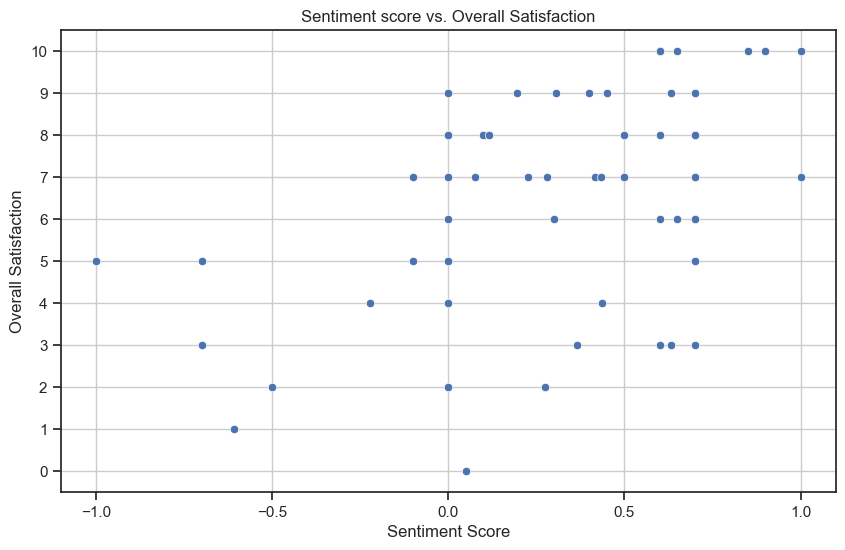

<Figure size 1000x600 with 0 Axes>

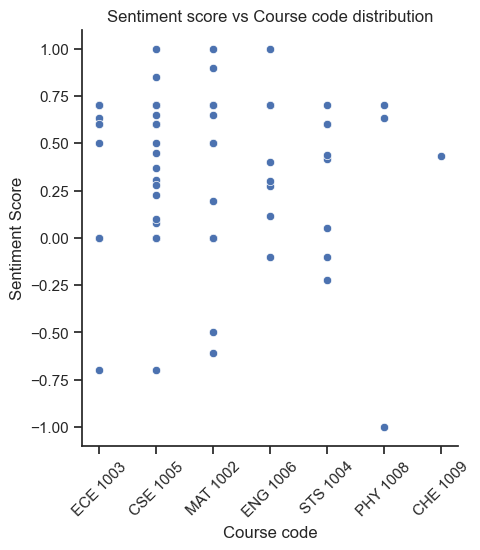

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(stop_words='english')
words=cv.fit_transform(df.Feedback)

get_ipython().system('pip install wordcloud')

# # Word Cloud

import wordcloud

# Join the reviews into a single string
reviews = " ".join([review for review in df["Feedback"]])

wc = wordcloud.WordCloud(background_color='white', max_words=25) # Create a WordCloud object
wc.generate(reviews) # Generate the word cloud

# Display the word cloud
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.title('Wordcloud for all feedback', fontsize=10)
plt.axis('off')
plt.show()

# Sentiment vs. Overall Satisfaction
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
sns.scatterplot(x='Sentiment_Score', y='Overall Satisfaction', data=new_df, color=color)
plt.xlabel('Sentiment Score')
plt.ylabel('Overall Satisfaction')
plt.title('Sentiment score vs. Overall Satisfaction')
plt.xticks(np.arange(-1, 1.1, 0.5))
plt.yticks(np.arange(0, 11))
plt.grid(True)
plt.show()

# Sentiment score Distribution by Course code
plt.figure(figsize=(10, 6))
color = sns.color_palette()[0]
sns.relplot(data=new_df, x='Course Code',y = 'Sentiment_Score', color=color, kind='scatter')
plt.xlabel('Course code')
plt.ylabel('Sentiment Score')
plt.title('Sentiment score vs Course code distribution')
plt.xticks(rotation=45)
plt.show();


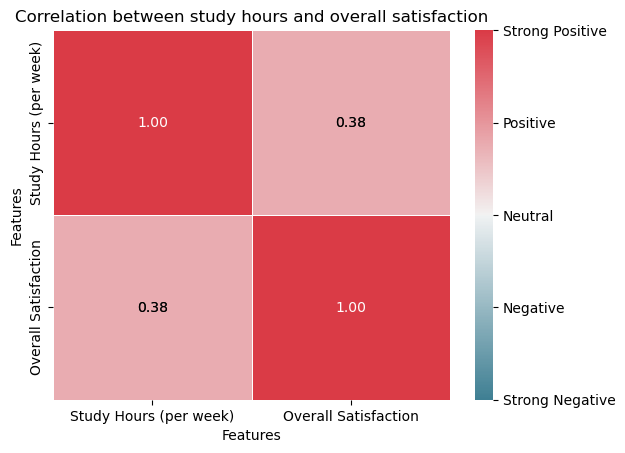

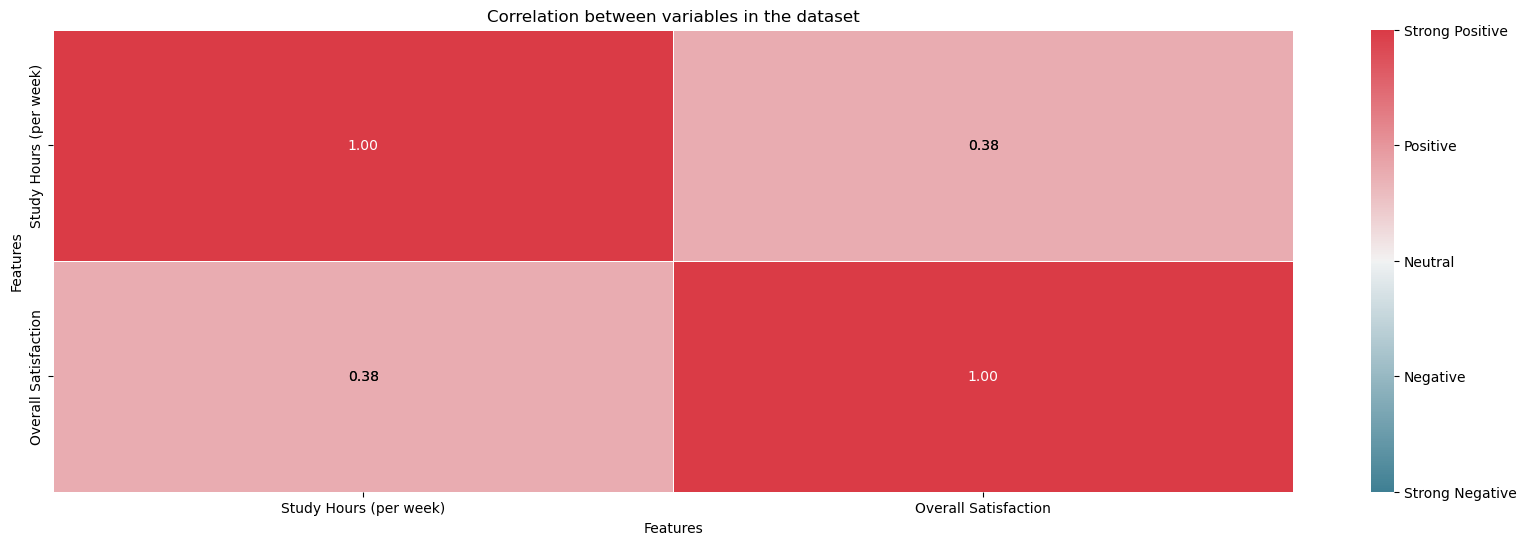

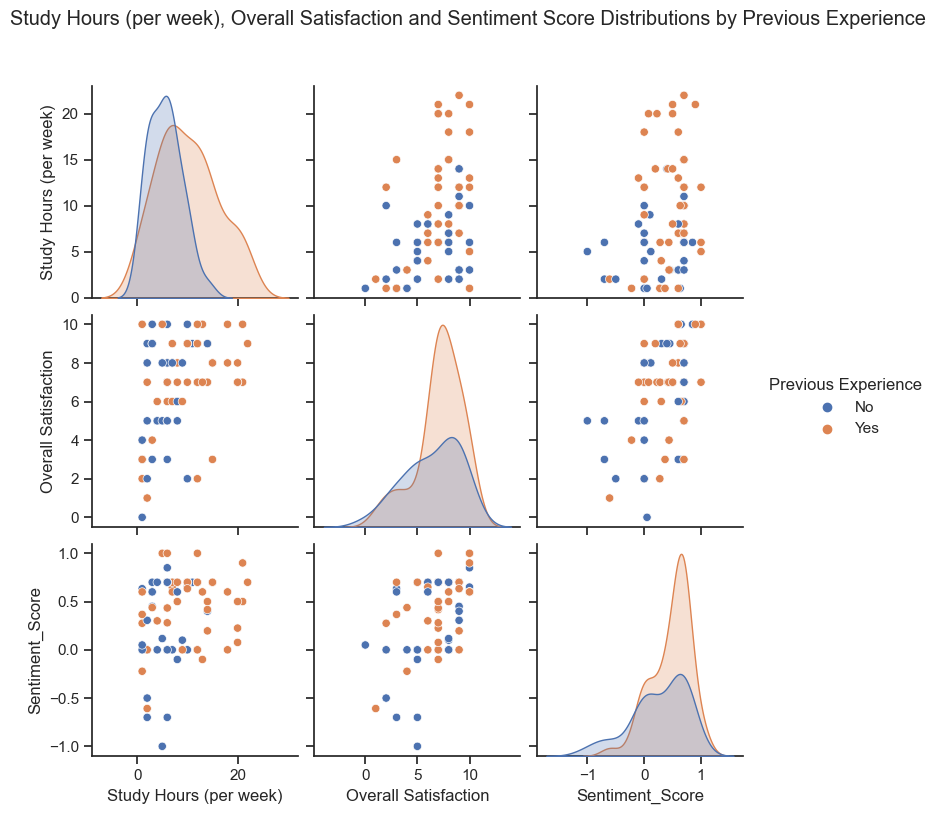

In [31]:
# # Correlation metrics

#Correlation between study hours and overall satisfaction
correlation_matrix = df[['Study Hours (per week)', 'Overall Satisfaction']].corr()

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation between Study Hours and Overall Satisfaction')

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            text = '{:.2f}'.format(correlation_matrix.iloc[i, j])
            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.set_ticklabels(['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive'])
plt.title('Correlation between study hours and overall satisfaction')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

# correlation matrix of all variables in the data
correlation_matrix = df.corr()

plt.figure(figsize=[20, 6])
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation between variables in the dataset')

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        if i != j:
            text = '{:.2f}'.format(correlation_matrix.iloc[i, j])
            plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black')

colorbar = plt.gca().collections[0].colorbar
colorbar.set_ticks([-1, -0.5, 0, 0.5, 1])
colorbar.set_ticklabels(['Strong Negative', 'Negative', 'Neutral', 'Positive', 'Strong Positive'])

plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

sns.set(style='ticks')
sns.pairplot(data=new_df, vars=['Study Hours (per week)', 'Overall Satisfaction', 
                            'Sentiment_Score'], hue='Previous Experience', markers='o')
plt.suptitle('Study Hours (per week), Overall Satisfaction and Sentiment Score Distributions by Previous Experience',
             y=1.08)
plt.show();

# Feature Engineering

In [33]:
#CONVERTING CATEGORICAL VARIABLES INTO NUMERICAL VALUES

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
new_df['Previous Experience'] = label_encoder.fit_transform(new_df['Previous Experience'])
new_df['Gender'] = label_encoder.fit_transform(new_df['Gender'])
new_df['Attendance'] = label_encoder.fit_transform(new_df['Attendance'])
new_df['Course Difficulty '] = label_encoder.fit_transform(new_df['Course Difficulty '])
new_df['Sentiment_label'] = label_encoder.fit_transform(new_df['Sentiment_label'])
new_df['Department'] = label_encoder.fit_transform(new_df['Department'])

In [34]:
new_df.head()

,Course Code,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department,Date,Time,Processed_Feedback,Sentiment_Score,Subjectivity_Score,Sentiment_label
0,ECE 1003,0,0,2,3,2,5,1,2024-03-10,22:13:18,course teaching bad,-0.7,0.666667,0
1,CSE 1005,0,0,2,2,11,9,1,2024-03-10,22:24:15,teaching good,0.7,0.600000,2
2,CSE 1005,0,0,2,0,7,8,1,2024-03-10,22:44:52,good,0.7,0.600000,2
3,CSE 1005,1,0,0,3,15,8,1,2024-03-11,13:29:44,lecture knowledgeable library facility good,0.7,0.600000,2
4,MAT 1002,1,0,1,3,6,8,0,2024-03-11,16:06:44,teaching almost good,0.7,0.600000,2


In [38]:
# Dropping unecessary variables
new_df.drop(['Date','Time','Processed_Feedback','Course Code'],axis = 1,inplace = True)
new_df.head()

,Previous Experience,Gender,Attendance,Course Difficulty,Study Hours (per week),Overall Satisfaction,Department,Sentiment_Score,Subjectivity_Score,Sentiment_label
0,0,0,2,3,2,5,1,-0.7,0.666667,0
1,0,0,2,2,11,9,1,0.7,0.600000,2
2,0,0,2,0,7,8,1,0.7,0.600000,2
3,1,0,0,3,15,8,1,0.7,0.600000,2
4,1,0,1,3,6,8,0,0.7,0.600000,2


# Fitting Multiple Linear Regression Model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

x = new_df.drop(['Previous Experience','Gender','Attendance','Course Difficulty ','Study Hours (per week)','Overall Satisfaction','Department','Sentiment_Score','Sentiment_label'], axis=1)  # Independent variables
y = new_df['Subjectivity_Score'] # Target variable

In [41]:
#Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fitting the Multiple Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [44]:
y_pred = model.predict(x_test)

#CALCULATING THE REQUIRED METRICS FOR THE MODEL
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted_r2:",adjusted_r2)

Mean Squared Error: 8.519407753995302e-33
Root Mean Squared Error: 9.230063788509428e-17
Mean Absolute Error: 5.551115123125783e-17
R-squared: 1.0
Adjusted_r2: 1.0


In [45]:
#FITTING THE MODEL WITH RESPECT TO THREE VARIABLES
x=new_df.drop(['Gender','Course Difficulty ','Study Hours (per week)'],axis=1)
y=new_df['Subjectivity_Score']
#Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Fitting the Multiple Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [47]:
y_pred = model.predict(x_test)

#CALCULATING THE REQUIRED METRICS FOR THE MODEL
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

n = x_test.shape[0]  # Number of observations
p = x_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted_r2:",adjusted_r2)

Mean Squared Error: 2.983219822334539e-30
Root Mean Squared Error: 1.7271999948860987e-15
Mean Absolute Error: 1.3616954761847303e-15
R-squared: 1.0
Adjusted_r2: 1.0


# Model Building and Evaluation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(new_df['Processed_Feedback'])

c = 3  # Specify the desired number of clusters
kmeans = KMeans(n_clusters=c, random_state=42)
kmeans.fit(tfidf_matrix)

new_df['Cluster'] = kmeans.labels_
print(new_df['Cluster'].value_counts())


2    59
1    19
0     5
Name: Cluster, dtype: int64


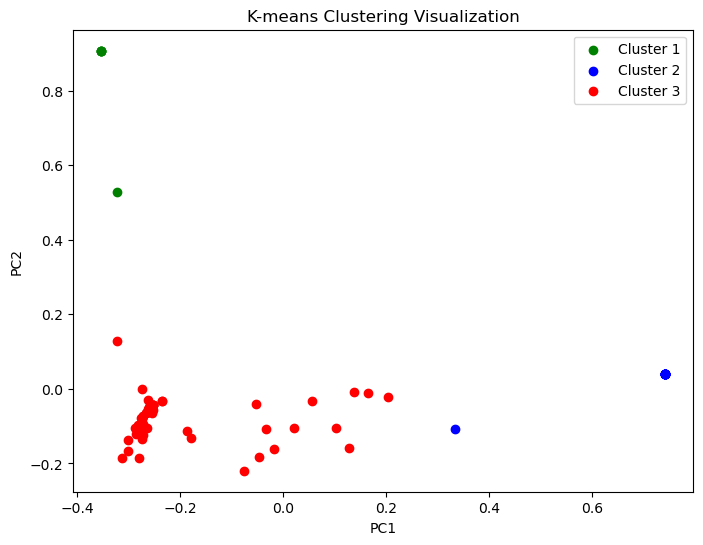

In [33]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(tfidf_matrix.toarray())

colors = ['green', 'blue', 'red']

plt.figure(figsize=(8, 6))
for cluster in range(c):
    plt.scatter(reduced_features[new_df['Cluster'] == cluster, 0], 
                reduced_features[new_df['Cluster'] == cluster, 1], 
                color=colors[cluster], label=f'Cluster {cluster+1}')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Visualization')
plt.legend()
plt.show()


In [39]:
X = tfidf_matrix
y = new_df['Sentiment_label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to preprocess and transform a feedback into TF-IDF vector
def preprocess_feedback(feedback, vectorizer):
    processed_feedback = preprocess_text(feedback)
    
    # Transform the preprocessed feedback into TF-IDF vector using the same vectorizer used during training
    tfidf_vector = vectorizer.transform([processed_feedback])
    
    return tfidf_vector

def predict_sentiment(feedback, svm_classifier, vectorizer):
    tfidf_vector = preprocess_feedback(feedback, vectorizer)
    
    sentiment_label = svm_classifier.predict(tfidf_vector)
    
    return sentiment_label

# Example random feedback
random_feedback = "Lectures are good and informative"

predicted_sentiment = predict_sentiment(random_feedback, svm_classifier,vectorizer)

print("Predicted Sentiment Label:", predicted_sentiment)


Accuracy: 0.7058823529411765
Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00         1
     Neutral       0.43      0.75      0.55         4
    Positive       0.89      0.67      0.76        12

    accuracy                           0.71        17
   macro avg       0.77      0.81      0.77        17
weighted avg       0.79      0.71      0.72        17

Predicted Sentiment Label: ['Positive']


In [41]:
# Train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Function to preprocess and transform a feedback into TF-IDF vector
def preprocess_feedback(feedback, vectorizer):
    processed_feedback = preprocess_text(feedback)
    
    # Transform the preprocessed feedback into TF-IDF vector using the same vectorizer used during training
    tfidf_vector = vectorizer.transform([processed_feedback])
    
    return tfidf_vector

def predict_sentiment(feedback, naive_bayes_classifier, vectorizer):
    tfidf_vector = preprocess_feedback(feedback, vectorizer)
    
    sentiment_label = naive_bayes_classifier.predict(tfidf_vector)
    
    return sentiment_label

# Example random feedback
random_feedback = "course teaching nice"

predicted_sentiment = predict_sentiment(random_feedback, naive_bayes_classifier,vectorizer)

print("Predicted Sentiment Label:", predicted_sentiment)


Accuracy: 0.7058823529411765
Classification Report:
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         1
     Neutral       0.00      0.00      0.00         4
    Positive       0.71      1.00      0.83        12

    accuracy                           0.71        17
   macro avg       0.24      0.33      0.28        17
weighted avg       0.50      0.71      0.58        17

Predicted Sentiment Label: ['Positive']
